In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/208.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/473.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/333.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/45.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/369.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/56.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/89.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/20.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/275.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/212.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/239.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/58.jpg
/kaggle/input/cityscapes-image-pa

In [2]:
# !wget --quiet https://github.com/sizhky/torch_snippets.git
!pip install torch_snippets
from torch_snippets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 55.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 67.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 62.0 MB/s eta 0:00:00:00:01
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=f7d2b3c9ed0d65005928ab6dd33523b15e5dc37b95b1594b86b7c1d5782c60b6
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing
  Attempting uninstall

In [3]:
# from torch_snippets import *
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchinfo import summary
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T, models, datasets
from xml.etree import ElementTree as et
import torchvision
import glob
import cv2
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# **0. Создаем 2 списка: путей каритнок и путей аннотаций**

In [4]:
# mask_files = glob.glob('../input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
im_ma_train = Glob('/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/*')
im_ma_val = Glob('/kaggle/input/cityscapes-image-pairs/cityscapes_data/val/*')

image_mask_train = [str(i) for i in im_ma_train]#.sort()
image_mask_val = [str(i) for i in im_ma_val]#.sort()

image_mask_train.sort()
image_mask_val.sort()

print(image_mask_train[:2])
print(image_mask_val[:2])
print(len(image_mask_train))
print(len(image_mask_val))

['/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/1.jpg', '/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/10.jpg']
['/kaggle/input/cityscapes-image-pairs/cityscapes_data/val/1.jpg', '/kaggle/input/cityscapes-image-pairs/cityscapes_data/val/10.jpg']
2975
500


In [5]:
image_mask_train[:5]

['/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/1.jpg',
 '/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/10.jpg',
 '/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/100.jpg',
 '/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/1000.jpg',
 '/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/1001.jpg']

In [6]:
image_mask_val[:5]

['/kaggle/input/cityscapes-image-pairs/cityscapes_data/val/1.jpg',
 '/kaggle/input/cityscapes-image-pairs/cityscapes_data/val/10.jpg',
 '/kaggle/input/cityscapes-image-pairs/cityscapes_data/val/100.jpg',
 '/kaggle/input/cityscapes-image-pairs/cityscapes_data/val/101.jpg',
 '/kaggle/input/cityscapes-image-pairs/cityscapes_data/val/102.jpg']

# **1. Смотрим картинки**

Each image file is 256x512

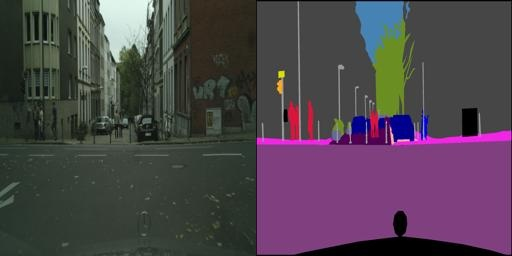

In [7]:
img_open = Image.open('/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/10.jpg')
img = cv2.imread("/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/10.jpg")
crop_img_left = img[0+2:256-2, 0+2:256-2] # img[y:y+h, x:x+w]
crop_img_right = img[0+2:256-2, 256+2:512-2] # img[y:y+h, x:x+w]
img_open

(252, 252, 3)


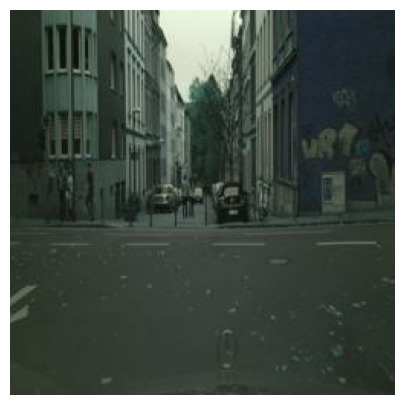

In [8]:
print(crop_img_left.shape)
show(crop_img_left)

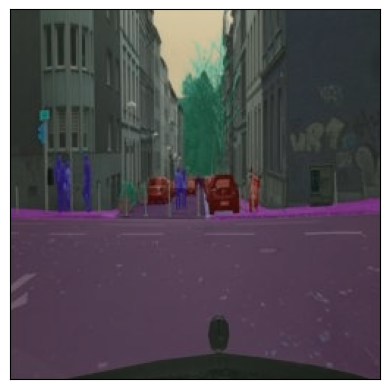

In [9]:
plt.imshow(crop_img_left)
plt.imshow(crop_img_right,alpha=0.4)
plt.xticks([]), plt.yticks([])
plt.show()

(252, 252, 3)


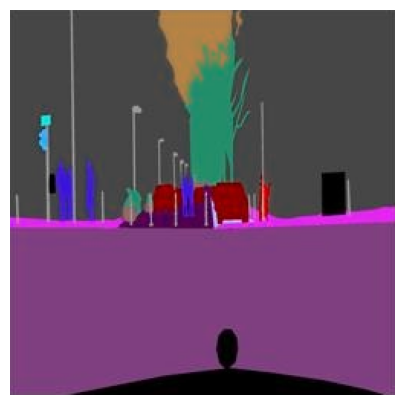

In [10]:
print(crop_img_right.shape)
show(crop_img_right)

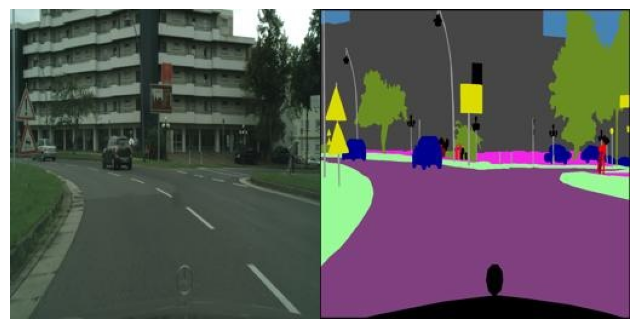

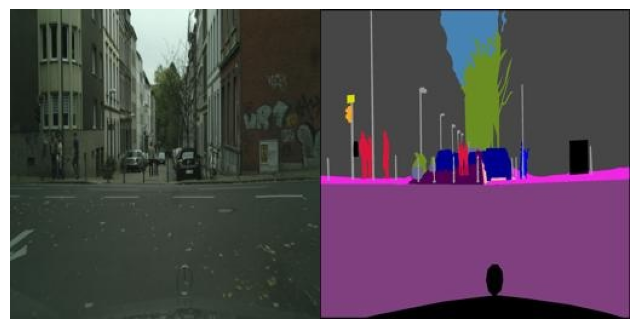

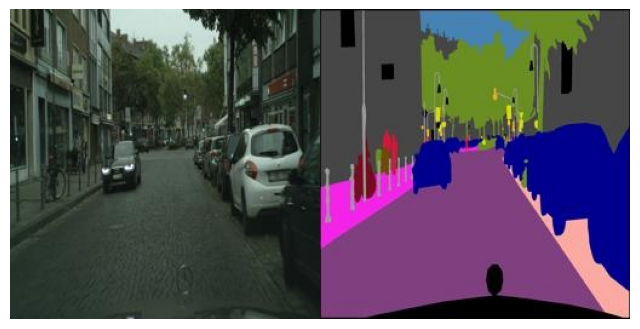

In [11]:
for i in image_mask_train[:3]:
    show(i,sz=8)

# **3. Смотрим аннотации (изображения)**

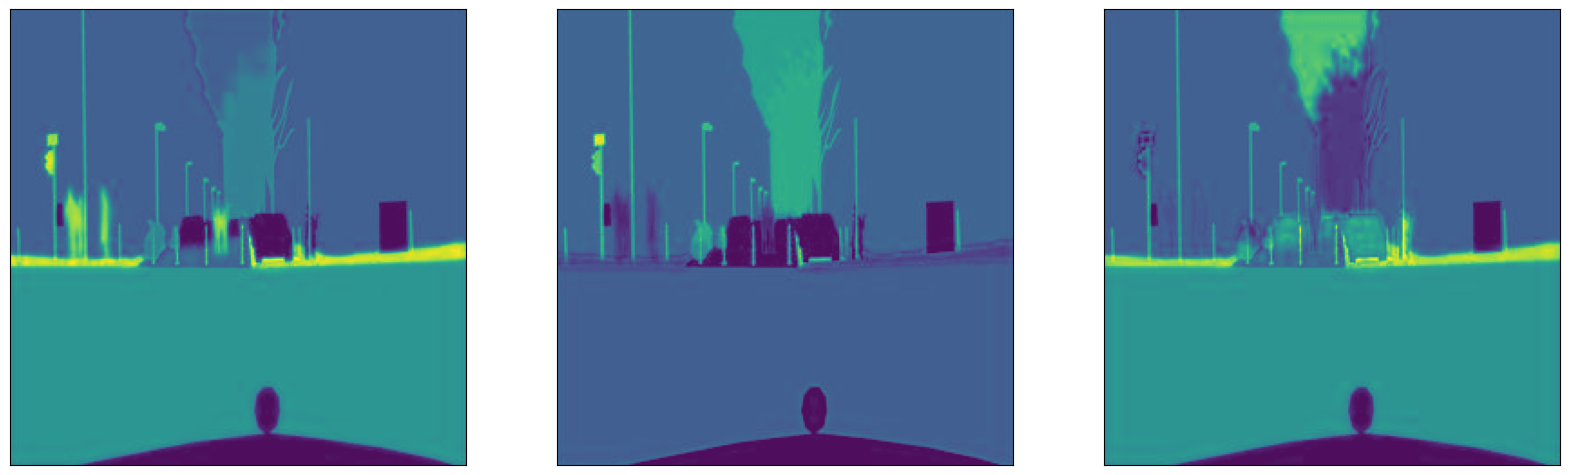

In [12]:
rows,cols=1,3
fig=plt.figure(figsize=(20,20))
for i in np.arange(1,4):
    fig.add_subplot(rows,cols,i)
    msk=crop_img_right
    msk=cv2.cvtColor(crop_img_right,cv2.COLOR_BGR2RGB)
#     msk=cv2.imread(msk_path)
    plt.imshow(msk.transpose(-1,0,1)[i-1],alpha=0.95)
    plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
crop_img_right.transpose(-1,0,1)

array([[[ 74,  73,  77, ...,  79,  76,  77],
        [ 74,  72,  74, ...,  74,  71,  73],
        [ 72,  68,  73, ...,  72,  66,  70],
        ...,
        [122, 122, 116, ..., 124, 128, 123],
        [116, 121, 110, ..., 109, 114, 114],
        [107, 115, 106, ..., 117, 125, 117]],

       [[ 74,  73,  77, ...,  79,  76,  77],
        [ 74,  72,  74, ...,  74,  71,  73],
        [ 72,  68,  73, ...,  72,  66,  70],
        ...,
        [ 71,  69,  60, ...,  66,  70,  68],
        [ 74,  77,  63, ...,  60,  65,  66],
        [ 73,  80,  68, ...,  75,  83,  75]],

       [[ 74,  73,  77, ...,  79,  76,  77],
        [ 74,  72,  74, ...,  74,  71,  73],
        [ 72,  68,  73, ...,  72,  66,  70],
        ...,
        [128, 126, 119, ..., 124, 128, 123],
        [121, 124, 112, ..., 110, 115, 114],
        [110, 120, 110, ..., 116, 124, 116]]], dtype=uint8)

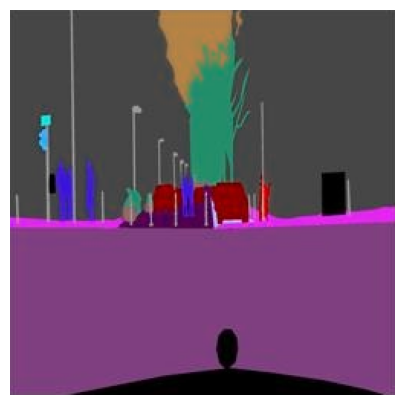

In [14]:
show(crop_img_right)

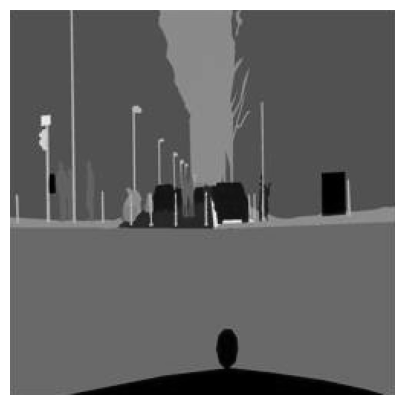

In [15]:
img=show(cv2.cvtColor(crop_img_right,cv2.COLOR_BGR2GRAY))
img

# **4. Смотрим содержимое каналов маски**

In [16]:
img = cv2.cvtColor(crop_img_right,cv2.COLOR_BGR2GRAY)
img

array([[ 74,  73,  77, ...,  79,  76,  77],
       [ 74,  72,  74, ...,  74,  71,  73],
       [ 72,  68,  73, ...,  72,  66,  70],
       ...,
       [ 94,  92,  84, ...,  90,  94,  91],
       [ 93,  96,  83, ...,  81,  86,  86],
       [ 88,  96,  85, ...,  92, 100,  92]], dtype=uint8)

In [17]:
img.shape

(252, 252)

In [18]:
# читаем картинку маски, 4меняем каналы местасми на (3,250,250),
# an = cv2.imread(mask[2], 1).transpose(2,0,1)#/255
# r,g,b = an

# lst = []
# for _ in [0,1,2]:
#     k = r,g,b
#     h = 'rgb'
#     for i in k[_]:
#         for j in i:
#             if j not in lst: lst.append(j)
#     print(f'Значения в канале {h[_]}: {lst}')

# **8. Трансформации**

In [19]:
tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # imagenet
])

# **9. Создаем DataLoader**

In [20]:
# img_open = Image.open('/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/10.jpg')
# img = cv2.imread("/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/10.jpg")
# crop_img_left = img[0+2:256-2, 0+2:256-2] # img[y:y+h, x:x+w]
# crop_img_right = img[0+2:256-2, 256+2:512-2] # img[y:y+h, x:x+w]
# # img_open
# mask = cv2.cvtColor(crop_img_right,cv2.COLOR_BGR2GRAY)
# mask = cv2.resize(mask, (224,224))
# print(mask.shape)
# # mask.transpose(-1,0,1)/255
# show(mask)
# mask.shape
# print(mask.shape)
# print('----------------------------')
# ce_masks = torch.Tensor(mask.transpose(-1,0,1)[None]).long().to(device)
# # show(ce_masks)
# ce_masks.shape

In [21]:
class SegData(Dataset):
    def __init__(self, list_pics_anns):
        self.list_pics_anns = list_pics_anns
    def __len__(self):
        return len(self.list_pics_anns)
    def __getitem__(self, ix):
        img = self.list_pics_anns[ix]
        img = cv2.imread(img)
        crop_img_left_image = img[0+2:256-2, 0+2:256-2] # img[y:y+h, x:x+w]
        crop_img_right_mask = img[0+2:256-2, 256+2:512-2] # img[y:y+h, x:x+w]
        
        crop_img_right_mask = cv2.cvtColor(crop_img_right_mask,cv2.COLOR_BGR2GRAY)
#         print(crop_img_right_mask)
        image = cv2.resize(crop_img_left_image, (224,224))
        mask = cv2.resize(crop_img_right_mask, (224,224))
#         image = Image.open(img_path).convert('RGB')
#         print(self.pictures[ix])
#         image = read(self.pictures[ix],1)#[..., ::-1]
#         print(image)
#         image = cv2.resize(image, (224,224))
#         print(image.shape)
#         mask = read(self.annotations[ix])
#         mask[mask > 0] = 1
#         print(mask.shape)
#         mask = cv2.resize(mask, (224,224))
#         print(mask.shape)
        return image, mask#.transpose(-1,0,1)/255
    def choose(self): return self[randint(len(self))]
    def collate_fn(self, batch):
        ims, masks = list(zip(*batch))
        ims = torch.cat([tfms(im.copy()/255.)[None] for im in ims]).float().to(device)
        ce_masks = torch.cat([torch.Tensor(mask[None]) for mask in masks]).long().to(device)
        return ims, ce_masks

In [22]:
trn_ds = SegData(image_mask_train)
val_ds = SegData(image_mask_val)
trn_dl = DataLoader(trn_ds, batch_size=4, shuffle=True, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, batch_size=1, shuffle=True, collate_fn=val_ds.collate_fn)

**Данные в dataset**
(224, 224, 3)
(224, 224)


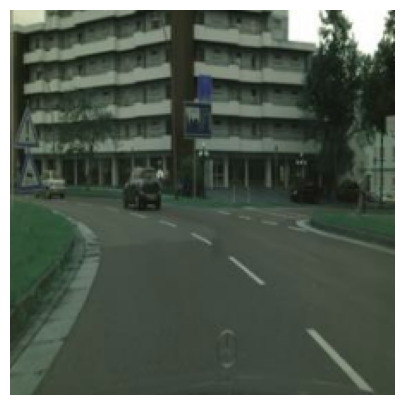

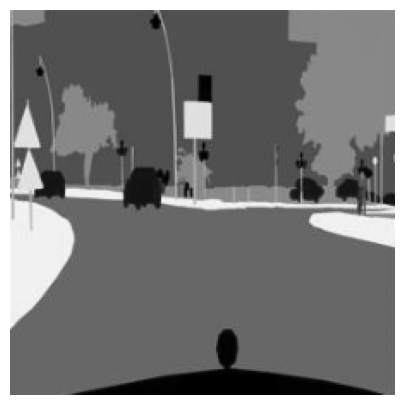

In [23]:
print('**Данные в dataset**')
for i in trn_ds:
    print(i[0].shape)
    print(i[1].shape)
    show(i[0])
    show(i[1])
    break

**Данные в dataloader**
torch.Size([4, 3, 224, 224])


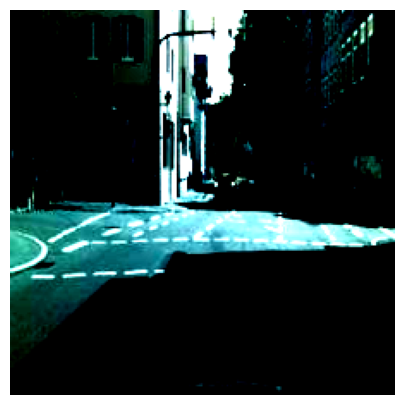

torch.Size([4, 224, 224])


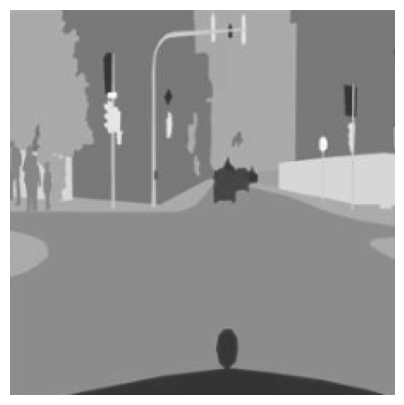

In [39]:
print('**Данные в dataloader**')
for i in trn_dl:
    print(i[0].shape)
    show(i[0][0])
    print(i[1].shape)
    show(i[1][0],alpha=0.8)
    break

# **4. Смотрим содержимое каналов маски в dl**

In [25]:
i[1][0]

tensor([[55, 76, 75,  ...,  3,  2,  2],
        [57, 73, 66,  ...,  1,  1,  1],
        [57, 73, 67,  ...,  0,  0,  1],
        ...,
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0]])

In [38]:
lst = []
for _ in trn_dl:
    for i in np.array(_[1][0].cpu()):
#         print(i.shape)
        for j in i:
#             print(j)
            if j not in lst: lst.append(j)
    break
print(f'Значения в маске, типа число классов: \n{sorted(lst)}')

Значения в маске, типа число классов: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207]


# **10. Смотрим картинку, маску и картинку с наложенной маской (в одну строку)**

In [27]:
x = iter(trn_ds)

(224, 224, 3)
(224, 224)


<function matplotlib.pyplot.show(close=None, block=None)>

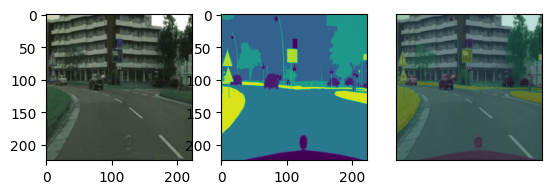

In [28]:
# входные данные должны быть размера (224, 224, 3) и (3, 224, 224)
im,m = next(x)
print(im.shape)
print(m.shape)
fig, ax = plt.subplots(1,3)
ax[0].imshow(im)
ax[1].imshow(m)
ax[2].imshow(im)
ax[2].imshow(m,alpha=0.3)
plt.xticks([]), plt.yticks([])
plt.show

# **11. Смотрим картинку**

In [29]:
def conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True)
    )

In [30]:
def up_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
        nn.ReLU(inplace=True)
    )

In [31]:
from torchvision.models import vgg16_bn
class UNet(nn.Module):
    def __init__(self, weights=True, out_channels=12):
        super().__init__()

        self.encoder = vgg16_bn(weights=weights).features
        self.block1 = nn.Sequential(*self.encoder[:6])
        self.block2 = nn.Sequential(*self.encoder[6:13])
        self.block3 = nn.Sequential(*self.encoder[13:20])
        self.block4 = nn.Sequential(*self.encoder[20:27])
        self.block5 = nn.Sequential(*self.encoder[27:34])

        self.bottleneck = nn.Sequential(*self.encoder[34:])
        self.conv_bottleneck = conv(512, 1024)

        self.up_conv6 = up_conv(1024, 512)
        self.conv6 = conv(512 + 512, 512)
        self.up_conv7 = up_conv(512, 256)
        self.conv7 = conv(256 + 512, 256)
        self.up_conv8 = up_conv(256, 128)
        self.conv8 = conv(128 + 256, 128)
        self.up_conv9 = up_conv(128, 64)
        self.conv9 = conv(64 + 128, 64)
        self.up_conv10 = up_conv(64, 32)
        self.conv10 = conv(32 + 64, 32)
        self.conv11 = nn.Conv2d(32, out_channels, kernel_size=1)
    def forward(self, x):
        block1 = self.block1(x)
        block2 = self.block2(block1)
        block3 = self.block3(block2)
        block4 = self.block4(block3)
        block5 = self.block5(block4)

        bottleneck = self.bottleneck(block5)
        x = self.conv_bottleneck(bottleneck)

        x = self.up_conv6(x)
        x = torch.cat([x, block5], dim=1)
        x = self.conv6(x)

        x = self.up_conv7(x)
        x = torch.cat([x, block4], dim=1)
        x = self.conv7(x)

        x = self.up_conv8(x)
        x = torch.cat([x, block3], dim=1)
        x = self.conv8(x)

        x = self.up_conv9(x)
        x = torch.cat([x, block2], dim=1)
        x = self.conv9(x)

        x = self.up_conv10(x)
        x = torch.cat([x, block1], dim=1)
        x = self.conv10(x)

        x = self.conv11(x)

        return x

In [32]:
ce = nn.CrossEntropyLoss()
def UnetLoss(preds, targets):
    # print(preds.shape)
    # print(targets.shape)
    # print('----------------------')
    ce_loss = ce(preds, targets)
    acc = (torch.max(preds, 1)[1] == targets).float().mean()
    return ce_loss, acc

In [33]:
def train_batch(model, data, optimizer, criterion):
    model.train()
    ims, ce_masks = data
    _masks = model(ims)
    # print(_masks.shape)
    # print(ce_masks.shape)
    optimizer.zero_grad()
    loss, acc = criterion(_masks, ce_masks)
    # print('---------------')
    loss.backward()
    optimizer.step()
    return loss.item(), acc.item()

@torch.no_grad()
def validate_batch(model, data, criterion):
    model.eval()
    ims, masks = data
    _masks = model(ims)
    loss, acc = criterion(_masks, masks)
    return loss.item(), acc.item()

In [34]:
model = UNet().to(device)
criterion = UnetLoss
optimizer = optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 20

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:03<00:00, 139MB/s]  


In [36]:
log = Report(n_epochs)
for ex in range(n_epochs):
    N = len(trn_dl)
    for bx, data in enumerate(trn_dl):
        loss, acc = train_batch(model, data, optimizer, criterion)
        log.record(ex+(bx+1)/N, trn_loss=loss, trn_acc=acc, end='\r')

    N = len(val_dl)
    for bx, data in enumerate(val_dl):
        loss, acc = validate_batch(model, data, criterion)
        log.record(ex+(bx+1)/N, val_loss=loss, val_acc=acc, end='\r')

    log.report_avgs(ex+1)

IndexError: Target 55 is out of bounds.

In [ ]:
log.plot_epochs(['trn_loss','val_loss'])

In [ ]:
log.plot_epochs(['trn_acc','val_acc'])

In [ ]:
im, mask = next(iter(val_dl))
_mask = model(im)
_, _mask = torch.max(_mask, dim=1)

subplots([im[0].permute(1,2,0).detach().cpu()[:,:,0], mask.permute(1,2,0).detach().cpu()[:,:,0]
,_mask.permute(1,2,0).detach().cpu()[:,:,0]],
nc=3, titles=['Original image','Original mask','Predicted mask'],sz=10)

In [ ]:
save_path = 'People_on_the street_multi_semantic_segm_Unet'
torch.save(model.state_dict(), save_path)
!du -hsc {save_path} # size of the model on disk

In [ ]:
# load_path = 'People_on_the street_multi_semantic_segm_Unet.pth'
# model.load_state_dict(torch.load(load_path)) #  # строка при загрузке на GРU
# # model.load_state_dict(torch.load(load_path, map_location=torch.device('cpu'))) # строка при загрузке на СРU